# Introduction to neural network

# A commonly used neural network structure: Multi-layer Perceptron (MLP)
A multi-layer perceptron (MLP) is a network work structure that consists of linear layer (full connect layer) and activation functions. Its mathematical function can be seen as:
 
$y = W_{n+1}(g_n(W_n(⋯g_0(W_0(x)+b_0)⋯)+b_n))+b_{n+1}$, 

where $n$ is the number of the hidden layer, and $W_n$ and $b_n$ denotes the parameters of a linear function.

The pseudocode for an MLP of $n$ hidden layers is show in below:
```Python
def pseudocode_for_mlp(x):
    z = linear_layer_1(x)
    z = activation_1(z)
    z = linear_layer_2(z)
    ...
    z = activation_n(z)
    out = linear_layer_n_plus_1(z)
    return out
```


### Simple MLP in PyTorch
The simplest MLP contains only one hidden layer, with the form of $y = W_{2}(g_1(W_1(x)+b_1))+b_{2}$, where $x$ is the input data. 

In this part, we learn how to write a simple MLP using PyTorch, and manually calculate the MLP for a better understanding of the simple MLP.

In [39]:
# import necessary packages
import torch
import torch.nn as nn

The following code implemented a simple MLP using PyTorch. Here we use ReLu as the activation function. You can also choose Sigmoid or any other type of activations functions as you like.

In [46]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU() # nn.Sigmoid(), nn.Tanh(), nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out
    
    def get_linear_layer_parameters(self):
        W1 = self.fc1.weight 
        b1 = self.fc1.bias
        W2 = self.fc2.weight 
        b2 = self.fc2.bias
        return [W1, b1, W2, b2]

Instantiate our simple MLP with input size of 3, hidden size of 4, and output size of 2.

In [47]:
torch_mlp = SimpleMLP(input_size=3,hidden_size=4,output_size=2)

Create the input data and get the output of MLP.

Suppose we have a data $x$ of two 3D points: $x = [[-1,1,2], [2,-1,0]]$. 

In [48]:
x = torch.tensor([[-1.,1.,2.],[2.,-1.,0.]])
y = torch_mlp(x) 
print("Output of Simple MLP (Torch):", y)

Output of Simple MLP (Torch): tensor([[-1.2678,  0.7484],
        [-0.2846,  0.4001]], grad_fn=<AddmmBackward>)


 ### Check if the simple MLP (PyTorch) works as we expected.

#### step 1: write a simple MLP by ourselves. 
*Note that the Linear Layer in PyTorch is implemented as $y=xW^T+b$, so we implemented in this way to better compare it with the pytorch version.

In [49]:

def manual_mlp(x, W1, b1, W2, b2):
    """Calculate the output of simple MLP by ourselves.
    """
    z = torch.matmul(x, W1.transpose(-1,-2)) + b1
    print("The output after first linear layer:", z)
    z = torch.max(torch.tensor(0.0), z)
    print("The output after the activation layer:", z)
    out = torch.matmul(z, W2.transpose(-1,-2)) + b2
    print("The output after first linear layer:", out)
    return out


Now we get the weights and bias of the PyTorch MLP, feed them to our manual MLP, and check the outputs.

In [55]:
W1, b1, W2, b2 = torch_mlp.get_linear_layer_parameters()
our_y = manual_mlp(x, W1, b1, W2, b2)
print("The output of our manual MLP is", our_y)

The output after first linear layer: tensor([[-0.0602,  1.0786,  0.9678,  1.9992],
        [-0.1088, -0.3804,  0.5789, -0.5356]], grad_fn=<AddBackward0>)
The output after the activation layer: tensor([[0.0000, 1.0786, 0.9678, 1.9992],
        [0.0000, 0.0000, 0.5789, 0.0000]], grad_fn=<MaxBackward2>)
The output after first linear layer: tensor([[-1.2678,  0.7484],
        [-0.2846,  0.4001]], grad_fn=<AddBackward0>)
The output of our manual MLP is tensor([[-1.2678,  0.7484],
        [-0.2846,  0.4001]], grad_fn=<AddBackward0>)


step 2: Check the output of each layer in PyTorch MLP is the same as our manual MLP.

In [56]:
torch_y = torch_mlp(x)
print("The output of PyTorch MLP is", torch_y)

The output of PyTorch MLP is tensor([[-1.2678,  0.7484],
        [-0.2846,  0.4001]], grad_fn=<AddmmBackward>)


# Commonly used losses

1) Mean Squared Error (MSE) / L2 Loss

In [60]:
import torch.nn as nn
mse_loss = nn.MSELoss()
y_hat = torch.tensor([1.5, 1.0])
y = torch.tensor([1.0, 1.0]) 
loss = mse_loss(y_hat, y)
print("Mean Squared Error (MSE) Loss:", loss.item())

Mean Squared Error (MSE) Loss: 0.125


2) Mean Absolute Error (MAE) / L1 Loss

In [61]:
l1_loss = nn.L1Loss()
y_hat = torch.tensor([1.5, 1.0])
y = torch.tensor([1.0, 1.0]) 
loss = l1_loss(y_hat, y)
print("L1 Loss:", loss.item())

L1 Loss: 0.25


3) KL divergence

Manually calculate KL divergence loss

In [153]:
import numpy as np

# True distribution (target)
P = np.array([0.4, 0.6])

# Predicted distribution (model output)
Q = np.array([0.3, 0.7])

# Calculate KL Divergence manually
kl_divergence = np.sum(P * np.log(P / Q))

print("KL Divergence (Manual Calculation):", kl_divergence)

KL Divergence (Manual Calculation): 0.022582421084357485


Calculate KL Divergence Loss using PyTorch

In [154]:
# True distribution (target)
P_torch = torch.tensor([0.4, 0.6]).unsqueeze(0)

# Predicted distribution (model output)
Q_torch = torch.tensor([0.3, 0.7]).unsqueeze(0)

# Calculate KL Divergence in PyTorch
kl_loss = nn.KLDivLoss(reduction='batchmean')  
loss = kl_loss(Q_torch.log(), P_torch)

print("KL Divergence (PyTorch with nn.KLDivLoss):", loss.item())

KL Divergence (PyTorch with nn.KLDivLoss): 0.02258247882127762


4) Cross-entropy Loss

Manually calculate the cross-entropy loss

In [35]:
# Step 1: Calculate softmax to get predicted probabilities
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Step 2: Calculate cross-entropy loss
def cross_entropy_loss(probs, true_labels):
    N = probs.shape[0]
    log_probs = -np.log(probs[range(N), true_labels])  # Get log of the predicted prob for the correct class
    return np.mean(log_probs)

# Example: raw model output (logits) for a batch of 2 examples and 3 classes
raw_prediction = np.array([[2.0, 1.0, 0.1], [0.1, 2.0, 1.0]])
# True labels (index of the correct class for each example)
true_labels = np.array([0, 1])
# Get predicted probabilities using softmax
predicted_probs = softmax(raw_prediction)
# Calculate the manual cross-entropy loss
loss = cross_entropy_loss(predicted_probs, true_labels)
print(f"Manual Cross-Entropy Loss: {loss}")

Manual Cross-Entropy Loss: 0.4170300162778335


Calculate cross-entropy loss in PyTorch

In [36]:
loss_fn = nn.CrossEntropyLoss()
# Suppose we have 3 classes and 2 examples in the batch
predictions = torch.tensor([[2.0, 1.0, 0.1], [0.1, 2.0, 1.0]])  # logits (raw model output)
labels = torch.tensor([0, 1])  # true labels

loss = loss_fn(predictions, labels)
print(f"Cross-Entropy Loss: {loss.item()}")

Cross-Entropy Loss: 0.41702985763549805


# Construct a neural network in PyTorch for training

Import necessary python packages

In [16]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Step 1: prepare the dataset.

In [21]:
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz
Using downloaded and verified file: ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Using downloaded and verified file: ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Using downloaded and verified file: ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


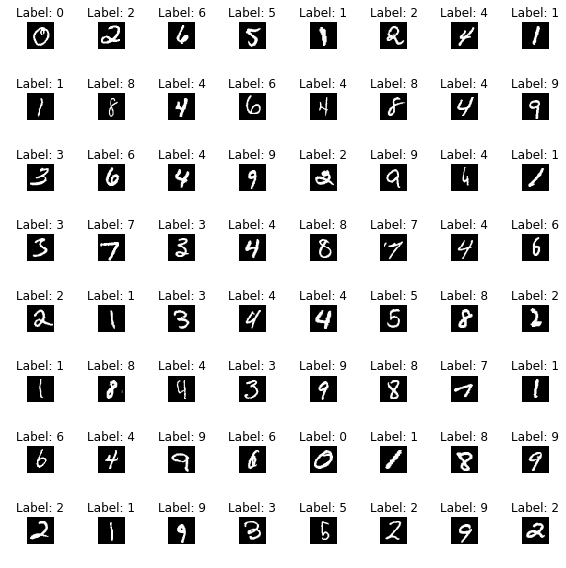

In [27]:
import matplotlib.pyplot as plt
# Ensure inline plotting in the notebook
%matplotlib inline
# Function to show images
def show_images(images, labels):
    # Create a grid of 8x8 images
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    axes = axes.flatten()
    
    # Loop through each image and display it
    for img, ax, label in zip(images, axes, labels):
        img = img.numpy().squeeze()  # Convert to numpy and remove unnecessary dimensions
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get a batch of images and labels
data_iter = iter(train_loader)
images, labels = data_iter.next()

# Show the first 64 images and labels
show_images(images[:64], labels[:64])

Step 2: Define and initialize the model, loss function, and optimizer.

In [22]:
# Define the MLP model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Activation function
        x = torch.relu(self.fc2(x))  # Activation function
        x = self.fc3(x)  # Output layer
        return x

# Initialize the model, loss function, and optimizer
model = SimpleMLP()
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Optimizer

Step 3: train the model

In [23]:
# Training the model
def train(model, train_loader, criterion, optimizer, epochs=1):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')
        
train(model, train_loader, criterion, optimizer, epochs=5)

Epoch 1, Loss: 1.0546570096506493
Epoch 2, Loss: 0.38928529353284125
Epoch 3, Loss: 0.32860240993151535
Epoch 4, Loss: 0.2933268640706661
Epoch 5, Loss: 0.2666934971918048


Step 4: test the model

Accuracy: 92.71%


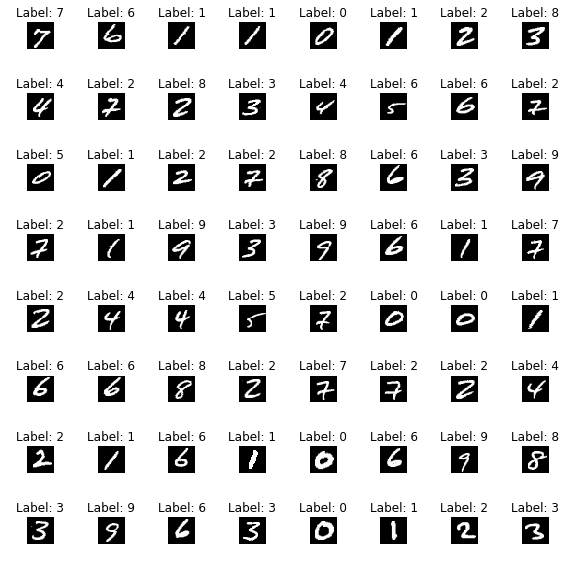

In [38]:
# Test the model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')
    show_images(images[:64], predicted[:64])
test(model, test_loader)
